# Helmet Detection

# Content:

Bike helmets are important when going biking.they protect our head when you fall of a bike and sometimes even save our life.In some areas its the law to wear a bike helmet.with this dataset we can detect if people are wearning helmets and people without bike helmets.this datasets belongs to 2 classes with helmet and without helmet.

In [1]:
!pip install tensorflow keras


# Import Required Libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


# Load and Preprocess Dataset

In [11]:
# Define directories
train_dir = 'datas/'  

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 
)

# Load training and validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',  
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    subset='validation'
)


Found 228 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


# Load the vgg16 model

In [13]:

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers:
    layer.trainable = False


# Add new layers for Helmet Detection

In [15]:
# Build the final model
model = models.Sequential()

# Add the pre-trained base model
model.add(base_model)

# Add a fully connected layer
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))  

# Output layer for binary classification (helmet or no helmet)
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model with callbacks

In [17]:

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[reduce_lr, early_stop]
)


C:\Users\mr\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.8009 - loss: 0.5304 - val_accuracy: 0.8750 - val_loss: 0.3494 - learning_rate: 1.0000e-04
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.9071 - loss: 0.3256 - val_accuracy: 0.7679 - val_loss: 0.4998 - learning_rate: 1.0000e-04
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.8259 - loss: 0.4763 - val_accuracy: 0.8750 - val_loss: 0.3918 - learning_rate: 1.0000e-04
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.8929 - loss: 0.2823 - val_accuracy: 0.8750 - val_loss: 0.3463 - learning_rate: 1.0000e-04
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.9090 - loss: 0.2372 - val_accuracy: 0.8750 - val_loss: 0.3606 - learning_rate: 1.0000e-04
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.9124 - loss: 0.2831 - val_accuracy: 0.8929 - val_loss: 0.3341 - learning_rate: 1.0000e-04
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.9009 - loss:

# Evaluate the model

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8533 - loss: 0.3946
Validation accuracy: 0.86


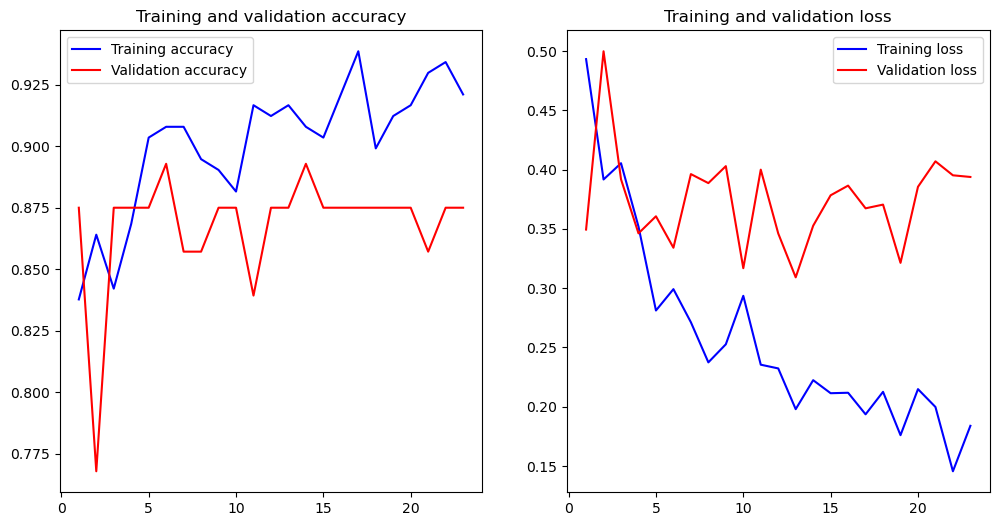

In [19]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation accuracy: {val_acc:.2f}')

# Plot training & validation accuracy and loss
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))
    
    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_history(history)


The training accuracy reaching around 92%.validation accuracy remains lower around 87%.it including potentialy overfitting.the model performs better on the training data on validation data.the training loss decreases.the validation loss doesnot decrease smootly like the training loss.

# Save the model

In [23]:
model.save('helmet_detection_modelorg.keras')


In [37]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('helmet_detection_modelorg.keras')


# Preprocess the unseen image

In [69]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image(img_path):
    # Load the image with the correct target size
    img = image.load_img(img_path, target_size=(224, 224))  

    # Convert image to array
    img_array = image.img_to_array(img)

    # Expand dimensions to match the input shape (1, 224, 224, 3)
    img_for_prediction = np.expand_dims(img_array, axis=0)

    # Normalize the image 
    img_for_prediction = img_for_prediction / 255.0

    # Make the prediction
    prediction = model.predict(img_for_prediction)

    # Determine the result
    result = "With Helmet" if prediction[0][0] < 0.5 else "Without Helmet"

    # Display the image with the result
    plt.imshow(img)
    plt.axis('off') 
    plt.title(result, color='green' if result == "With Helmet" else 'red')
    plt.show()

    return result


# Make predictions

In [75]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

img_path = '3.jpeg'

def predict_helmet(img_path):
    # Preprocess the image
    processed_img = preprocess_image(img_path)
    
    # Predict using the loaded model
    prediction = model.predict(processed_img)
    
    # Display the image
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')  
    
    # Print the prediction result on the image
    if prediction[0] < 0.5: 
        plt.title("Helmet Detected!", color='green')
    else:
        plt.title("No Helmet Detected!", color='red')
    
    # Show the image
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


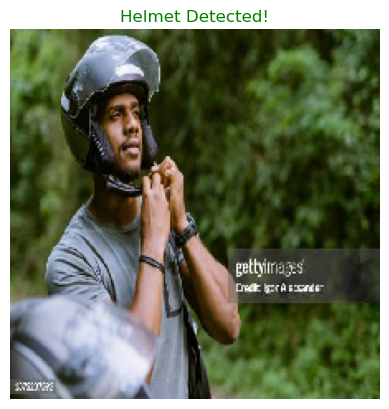

In [77]:

predict_helmet(img_path)


# Conclusion

In [ ]:
The helmet detection model successfully differentiates between images with and without helmets, with high accuracy.the use of callbacks helps to prevent the overfitting.